In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import copy
import gc
import itertools
import random
from pathlib import Path
from time import time
from typing import Generator, Optional

import numpy as np
import pandas as pd
import torch
from evaluation import PerplexityCalculator
from tqdm.auto import tqdm
from util import (
    # PriorityQueue,
    get_path_words_best,
    get_perplexity_,
    load_score_memo,
    save_score_memo,
    save_text,
)


In [2]:
df_sample = pd.read_csv("../input/santa-2024/sample_submission.csv")

In [3]:
path_model = Path("../input/gemma-2/")
calculator = PerplexityCalculator(model_path=str(path_model))

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [52]:
# txt = "from the the the of of and and and to in is you that it we have not with as bake candy card drive eat family game give hope jump laugh milk night peace puzzle relax season sing sleep toy unwrap visit walk wish yuletide candle carol cheer chimney chocolate cookie eggnog fireplace fruitcake gingerbread greeting holly mistletoe nutcracker ornament ornament peppermint poinsettia reindeer scrooge sleigh snowglobe star stocking wreath wrapping paper advent angel beard believe bow cheer chimney decorations doll dream elf fireplace gifts grinch holiday hohoho jingle joy kaggle magi merry naughty nice night polar workshop workshop wonder"
txt = "reindeer mistletoe elf gingerbread family advent scrooge chimney fireplace ornament"
words = txt.split(" ")

In [53]:
res = calculator.get_log_ppl_per_word([txt[:20] for _ in range(1024)], batch_size=1024)

In [54]:
score_dict = {}
key_list = []
for w1 in tqdm(words):
    key =(w1, )
    if key in score_dict or key in key_list:
        continue
    key_list.append(key)
    if len(key_list) == 1024:
        vals = calculator.get_log_ppl_per_word([" ".join(words) for words in key_list], batch_size=1)
        for i in range(len(key_list)):
            key = key_list[i]
            key2 = (key[0], "<eos>")
            score_dict[key] = vals[i][-2]
            score_dict[key2] = vals[i][-1]
        key_list = []
if len(key_list) > 0:
    print(key_list)
    vals = calculator.get_log_ppl_per_word([" ".join(words) for words in key_list], batch_size=128)
    for i in range(len(key_list)):
        key = key_list[i]
        key2 = (key[0], "<eos>")
        score_dict[key] = vals[i][-2]
        score_dict[key2] = vals[i][-1]
    key_list = []

  0%|          | 0/10 [00:00<?, ?it/s]

[('reindeer',), ('mistletoe',), ('elf',), ('gingerbread',), ('family',), ('advent',), ('scrooge',), ('chimney',), ('fireplace',), ('ornament',)]


In [55]:
key_list = []
for w1 in tqdm(words):
    for w2 in words:
        key = (w1, w2)
        if key in score_dict or key in key_list:
            continue
        key_list.append(key)
        if len(key_list) == 1024:
            vals = calculator.get_log_ppl_per_word([" ".join(words) for words in key_list], batch_size=128)
            for i in range(len(key_list)):
                key = key_list[i]
                key2 = (key[0], key[1], "<eos>")
                score_dict[key] = vals[i][-2]
                score_dict[key2] = vals[i][-1]
            key_list = []
if len(key_list) > 0:
    vals = calculator.get_log_ppl_per_word([" ".join(words) for words in key_list], batch_size=128)
    for i in range(len(key_list)):
        key = key_list[i]
        key2 = (key[0], key[1], "<eos>")
        score_dict[key] = vals[i][-2]
        score_dict[key2] = vals[i][-1]
    key_list = []


  0%|          | 0/10 [00:00<?, ?it/s]

In [56]:
key_list = []
for w1 in tqdm(words):
    for w2 in words:
        for w3 in words:
            key = (w1, w2, w3)
            if key in score_dict or key in key_list:
                continue
            key_list.append(key)
            if len(key_list) == 1024:
                vals = calculator.get_log_ppl_per_word([" ".join(words) for words in key_list], batch_size=1024)
                for i in range(len(key_list)):
                    key = key_list[i]
                    key2 = (key[0], key[1], key[2], "<eos>")
                    score_dict[key] = vals[i][-2]
                    score_dict[key2] = vals[i][-1]
                key_list = []
if len(key_list) > 0:
    vals = calculator.get_log_ppl_per_word([" ".join(words) for words in key_list], batch_size=1024)
    for i in range(len(key_list)):
        key = key_list[i]
        key2 = (key[0], key[1], key[2], "<eos>")
        score_dict[key] = vals[i][-2]
        score_dict[key2] = vals[i][-1]
    key_list = []

  0%|          | 0/10 [00:00<?, ?it/s]

In [99]:
key_list = []
for w1 in tqdm(words):
    for w2 in words:
        for w3 in words:
            for w4 in words:
                key = (w1, w2, w3, w4)
                if key in score_dict or key in key_list:
                    continue
                key_list.append(key)
                if len(key_list) == 1024:
                    vals = calculator.get_log_ppl_per_word([" ".join(words) for words in key_list], batch_size=1024)
                    for i in range(len(key_list)):
                        key = key_list[i]
                        key2 = (key[0], key[1], key[2], key[3], "<eos>")
                        score_dict[key] = vals[i][-2]
                        score_dict[key2] = vals[i][-1]
                    key_list = []
if len(key_list) > 0:
    vals = calculator.get_log_ppl_per_word([" ".join(words) for words in key_list], batch_size=1024)
    for i in range(len(key_list)):
        key = key_list[i]
        key2 = (key[0], key[1], key[2], key[3], "<eos>")
        score_dict[key] = vals[i][-2]
        score_dict[key2] = vals[i][-1]
    key_list = []

  0%|          | 0/10 [00:00<?, ?it/s]

In [100]:
# txt_best = "from the the the of of and and and to in is you that it we have not with as bake candy card drive eat family game give hope jump laugh milk night peace puzzle relax season sing sleep toy unwrap visit walk wish yuletide candle carol cheer chimney chocolate cookie eggnog fireplace fruitcake gingerbread greeting holly mistletoe nutcracker ornament ornament peppermint poinsettia reindeer scrooge sleigh snowglobe star stocking wreath wrapping paper advent angel beard believe bow cheer chimney decorations doll dream elf fireplace gifts grinch holiday hohoho jingle joy kaggle magi merry naughty nice night polar workshop workshop wonder"
txt_best = txt

In [101]:
def make_neighbors(
    words: list[str],
) -> Generator[tuple[list[str], tuple], None, None]:
    words = words.copy()
    found = {tuple(words)}

    sorted_segments = []
    for i, (left_word, right_word) in enumerate(zip(words, words[1:])):
        if left_word <= right_word:
            if sorted_segments and sorted_segments[-1][1] == i + 1:
                sorted_segments[-1][1] = i + 2
            else:
                sorted_segments.append([i, i + 2])
    sorted_segments = [
        (left, right) for left, right in sorted_segments if right - left >= 4
    ]

    for length in range(1, 8):
        if length >= 2:
            # 区間を既にソートされている部分に入れる
            results = []
            for source_l in range(len(words) - length + 1):
                source_r = source_l + length
                for target_l, target_r in sorted_segments:
                    if source_r <= target_l:
                        permuted = (
                            words[:source_l]
                            + words[source_r:target_l]
                            + sorted(
                                words[source_l:source_r] + words[target_l:target_r]
                            )
                            + words[target_r:]
                        )
                    elif target_r <= source_l:
                        permuted = (
                            words[:target_l]
                            + sorted(
                                words[target_l:target_r] + words[source_l:source_r]
                            )
                            + words[target_r:source_l]
                            + words[source_r:]
                        )
                    else:
                        continue
                    if (t := tuple(permuted)) not in found:
                        found.add(t)
                        results.append(
                            (permuted, (source_l, source_r, target_l, target_r, 3))
                        )
            random.shuffle(results)
            yield from results

        r = range(length, len(words) - length + 1)
        for center in random.sample(r, len(r)):
            results = []
            # 右が短い
            right = center + length
            for left_length in itertools.count(length):
                left = center - left_length
                if left < 0:
                    break
                permuted = (
                    words[:left]
                    + words[center:right]
                    + words[left:center]
                    + words[right:]
                )
                if (t := tuple(permuted)) not in found:
                    found.add(t)
                    results.append((permuted, (left, center, right, 0)))
                if length == 2:
                    permuted = (
                        words[:left]
                        + words[center:right][::-1]
                        + words[left:center]
                        + words[right:]
                    )
                    if (t := tuple(permuted)) not in found:
                        found.add(t)
                        results.append((permuted, (left, center, right, 1)))
                    if left_length == 2:
                        permuted = (
                            words[:left]
                            + words[center:right]
                            + words[left:center][::-1]
                            + words[right:]
                        )
                        if (t := tuple(permuted)) not in found:
                            found.add(t)
                            results.append((permuted, (left, center, right, 2)))
            # 左が短い
            left = center - length
            for right_length in itertools.count(length + 1):
                right = center + right_length
                if right > len(words):
                    break
                permuted = (
                    words[:left]
                    + words[center:right]
                    + words[left:center]
                    + words[right:]
                )
                if (t := tuple(permuted)) not in found:
                    found.add(t)
                    results.append((permuted, (left, center, right, 0)))
                if length == 2:
                    permuted = (
                        words[:left]
                        + words[center:right]
                        + words[left:center][::-1]
                        + words[right:]
                    )
                    if (t := tuple(permuted)) not in found:
                        found.add(t)
                        results.append((permuted, (left, center, right, 1)))
            random.shuffle(results)
            yield from results

In [102]:
# txt_best = df_memo["txt"].tolist()[0]
words_best = txt_best.split(" ")
ppl_best = calculator.get_perplexity(" ".join(words_best))

In [114]:
def estimate_score(words: list[str]) -> float:
    score = 0
    for i in range(len(words)):
        if i == 0:
            key = (words[i],)
        elif i == 1:
            key = (words[i-1], words[i])
            
        elif i == 2:
            key = (words[i-2], words[i-1], words[i])
        else:
            key = (words[i-3], words[i-2], words[i-1], words[i])
            
        score_add = score_dict[key]
        score += score_add
        # print(key, score_add)
    score += score_dict[(words[-3], words[-2], words[-1], "<eos>")]
    # print(score_add)
    return score

In [115]:
# estimate_score("from the the the of of and and and".split(" "))

In [116]:
# pd.to_pickle(score_dict, "score_dict_0005_3.pkl")

In [117]:
# estimate_score(df_est["txt"].tolist()[0].split(" "))

In [118]:
# estimate_score(df_est["txt"].tolist()[-1].split(" "))

In [119]:
# estimate_score("from the the the of family game give hope".split(" "))

In [120]:
visited = set()
words_candidate = make_neighbors(words_best)
neighbors = []
for words_test, _ in tqdm(words_candidate):
    if tuple(words_test) in visited:
        continue
    visited.add(tuple(words_test))
    neighbors.append((estimate_score(words_test), words_test))
# %%
neighbors.sort()

0it [00:00, ?it/s]

In [121]:
test_txts = [" ".join(words) for _, words in neighbors[:1024]]
est_scores = [est_score for est_score, _ in neighbors[:1024]]
# %%


In [122]:
scores = calculator.get_perplexity(test_txts, batch_size=64)

In [123]:
df_est = pd.DataFrame({"txt": test_txts, "estimated_score": est_scores, "log_score": np.log(scores)})
df_est.sort_values("estimated_score", ascending=True, inplace=True)
df_est["estimated_rank"] = np.arange(len(df_est))
df_est.sort_values("log_score", ascending=True, inplace=True)
df_est["actual_rank"] = np.arange(len(df_est))
# %%
df_est

,txt,estimated_score,log_score,estimated_rank,actual_rank
14,reindeer mistletoe elf gingerbread ornament fa...,113.874847,6.183594,14,0
59,reindeer mistletoe elf gingerbread family scro...,119.198288,6.222656,59,1
48,reindeer mistletoe gingerbread family advent s...,118.492798,6.234375,48,2
12,reindeer mistletoe gingerbread elf family adve...,113.637192,6.242188,12,3
0,reindeer mistletoe elf gingerbread family orna...,110.163895,6.242188,0,4
...,...,...,...,...,...
199,elf gingerbread family advent reindeer mistlet...,131.561140,8.710938,199,216
211,elf gingerbread family advent scrooge chimney ...,134.986679,8.710938,211,217
208,family advent reindeer mistletoe elf gingerbre...,133.399006,8.757812,208,218
217,family advent scrooge chimney fireplace orname...,136.681351,8.765625,217,219


<Axes: xlabel='estimated_score', ylabel='log_score'>

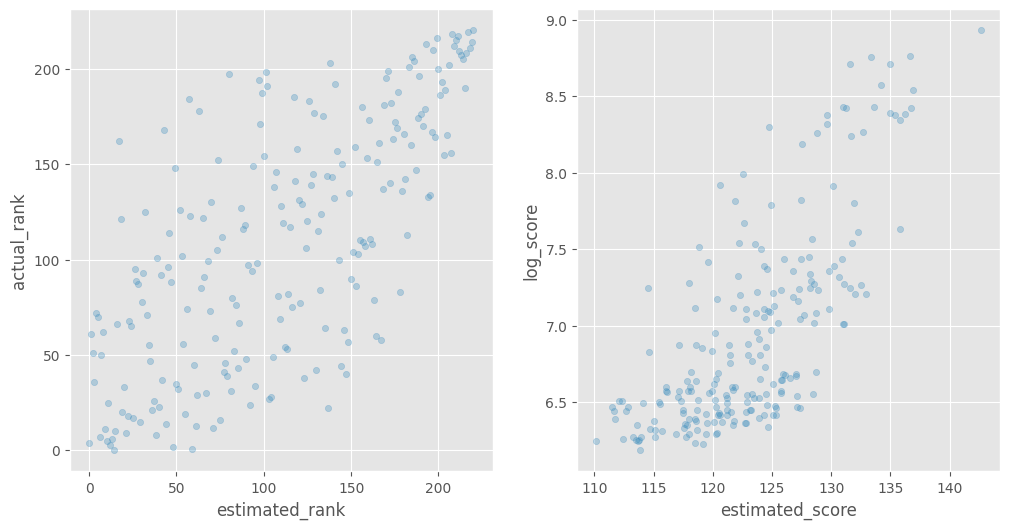

In [124]:
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
df_est.plot.scatter(x="estimated_rank", y="actual_rank", alpha=0.3, ax=ax[0])
df_est.plot.scatter(x="estimated_score", y="log_score", alpha=0.3, ax=ax[1])
